In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
name_column=['id','entity','target','Tweet content']
df=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',names=name_column)

In [4]:
df.head(10)

,id,entity,target,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             74682 non-null  int64 
 1   entity         74682 non-null  object
 2   target         74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe()

,id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
df=df.drop(columns=['id','entity'],axis=1)
df

,target,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [8]:
df.isna().sum()

target             0
Tweet content    686
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
count=df['target'].value_counts()
count

target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

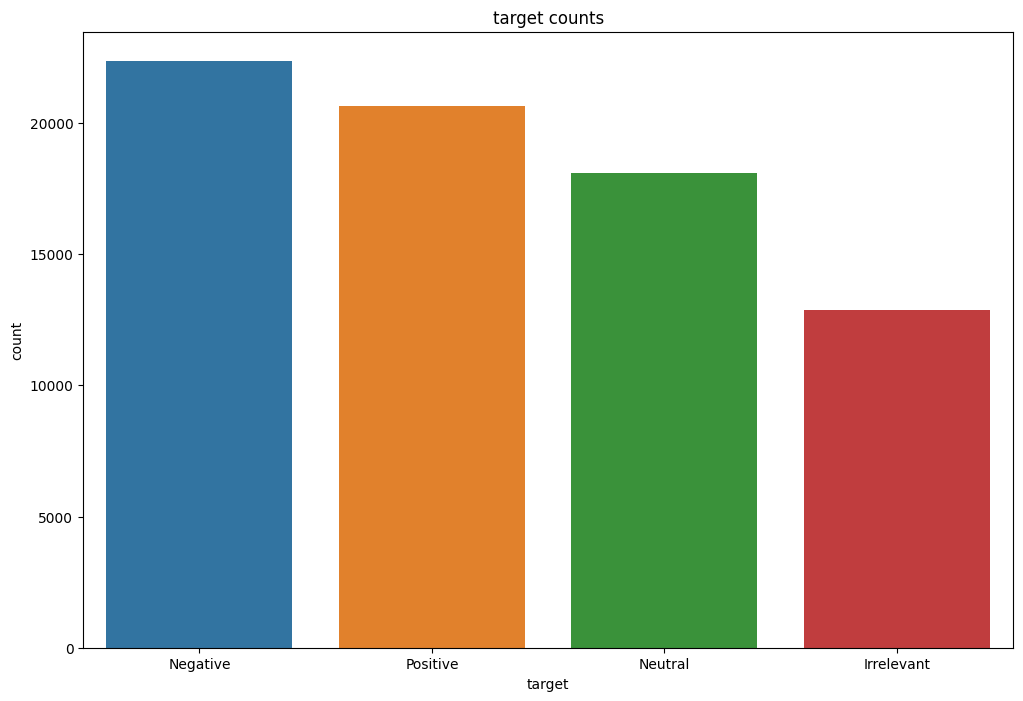

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=count.index,y=count.values)
plt.title('target counts')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

In [12]:
punc=punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
def remove_punct(tokens):
    text =""
    punc = punctuation
    punc+='``'
    punc+="''«»؟"
    for w in tokens:
        if w not in punc:
            text+=w
    return text

df['Tweet content']=df['Tweet content'].apply(lambda x:remove_punct(x))

In [14]:
df['Tweet content'].shape

(73996,)

In [15]:
df

,target,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [16]:
def tokenize(text):
    tokens=word_tokenize(text)
    return tokens

df['Tweet content']=df['Tweet content'].apply(lambda x : tokenize(x))
df.head()

,target,Tweet content
0,Positive,"[im, getting, on, borderlands, and, i, will, m..."
1,Positive,"[I, am, coming, to, the, borders, and, I, will..."
2,Positive,"[im, getting, on, borderlands, and, i, will, k..."
3,Positive,"[im, coming, on, borderlands, and, i, will, mu..."
4,Positive,"[im, getting, on, borderlands, 2, and, i, will..."


In [17]:
def remove_stopwords(tok_l,stopwords):
    filtered_sentence =[]
    for w in tok_l:
        if w not in stopwords:
            filtered_sentence.append(w)
    return filtered_sentence

In [18]:
stop_words_en = nltk.corpus.stopwords.words('english')
df['Tweet content']=df['Tweet content'].apply(lambda x : remove_stopwords(x,stop_words_en))

In [19]:
df

,target,Tweet content
0,Positive,"[im, getting, borderlands, murder]"
1,Positive,"[I, coming, borders, I, kill]"
2,Positive,"[im, getting, borderlands, kill]"
3,Positive,"[im, coming, borderlands, murder]"
4,Positive,"[im, getting, borderlands, 2, murder]"
...,...,...
74677,Positive,"[Just, realized, Windows, partition, Mac, like..."
74678,Positive,"[Just, realized, Mac, window, partition, 6, ye..."
74679,Positive,"[Just, realized, windows, partition, Mac, 6, y..."
74680,Positive,"[Just, realized, windows, partition, Mac, like..."


In [20]:
df['Tweet content'] = df['Tweet content'].apply(lambda x: ' '.join(x).replace(' .', '.'))

In [21]:
df

,target,Tweet content
0,Positive,im getting borderlands murder
1,Positive,I coming borders I kill
2,Positive,im getting borderlands kill
3,Positive,im coming borderlands murder
4,Positive,im getting borderlands 2 murder
...,...,...
74677,Positive,Just realized Windows partition Mac like 6 yea...
74678,Positive,Just realized Mac window partition 6 years beh...
74679,Positive,Just realized windows partition Mac 6 years be...
74680,Positive,Just realized windows partition Mac like 6 yea...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()
bow_vectors = vectorizer.fit_transform(df['Tweet content'])

In [24]:
bow_df = pd.DataFrame(bow_vectors.toarray(), columns=vectorizer.get_feature_names_out())

print(bow_df)

       00  000  00011  00014  00015  00015cant  00016  00054  001  00105  ...  \
0       0    0      0      0      0          0      0      0    0      0  ...   
1       0    0      0      0      0          0      0      0    0      0  ...   
2       0    0      0      0      0          0      0      0    0      0  ...   
3       0    0      0      0      0          0      0      0    0      0  ...   
4       0    0      0      0      0          0      0      0    0      0  ...   
...    ..  ...    ...    ...    ...        ...    ...    ...  ...    ...  ...   
73991   0    0      0      0      0          0      0      0    0      0  ...   
73992   0    0      0      0      0          0      0      0    0      0  ...   
73993   0    0      0      0      0          0      0      0    0      0  ...   
73994   0    0      0      0      0          0      0      0    0      0  ...   
73995   0    0      0      0      0          0      0      0    0      0  ...   

       خلاص  خلاصunk  عبر  

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=5000)
x=tf.fit_transform(df['Tweet content'])

In [26]:
y=df['target']

In [27]:
x.shape, y.shape

((73996, 5000), (73996,))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score,ConfusionMatrixDisplay

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = rfc.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8802027027027027


In [33]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

  Irrelevant       0.95      0.79      0.86      2696
    Negative       0.90      0.91      0.91      4380
     Neutral       0.89      0.86      0.87      3605
    Positive       0.82      0.92      0.87      4119

    accuracy                           0.88     14800
   macro avg       0.89      0.87      0.88     14800
weighted avg       0.88      0.88      0.88     14800



In [34]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[2134  142  133  287]
 [  33 3982  123  242]
 [  35  158 3102  310]
 [  47  134  129 3809]]


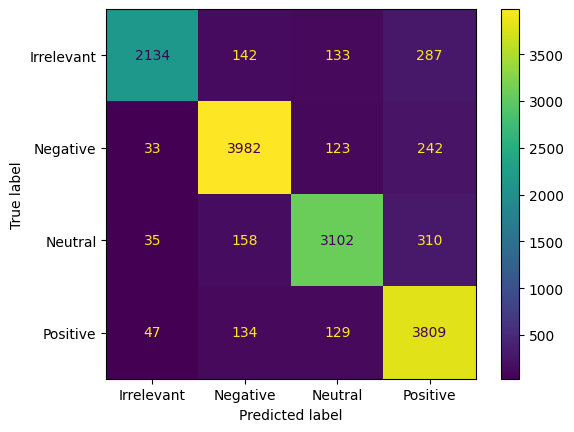

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)